# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


&lt;matplotlib.axes._subplots.AxesSubplot at 0x7f8756d84d90&gt;

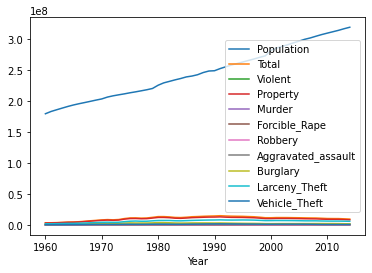

In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/Gabvaztor/data_science_jun_2020/master/week9/day2/data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

In [3]:
df.head(10)

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600


No handles with labels found to put in legend.


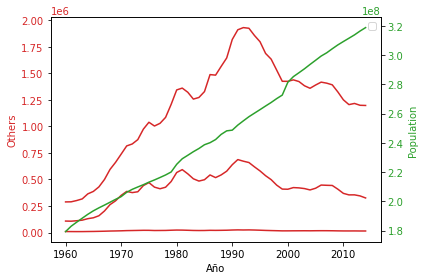

In [4]:


a=df.index
y1 = df[["Murder","Violent","Robbery"]]
y2 = df.Population

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Año')
ax1.set_ylabel('Others', color=color)
ax1.plot(a, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:green'
ax2.set_ylabel('Population', color=color)  
ax2.plot(a, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.legend()
plt.show()

4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 

In [5]:
df.drop(columns=["Population", "Total"], axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 1960 to 2014
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Violent             55 non-null     int64
 1   Property            55 non-null     int64
 2   Murder              55 non-null     int64
 3   Forcible_Rape       55 non-null     int64
 4   Robbery             55 non-null     int64
 5   Aggravated_assault  55 non-null     int64
 6   Burglary            55 non-null     int64
 7   Larceny_Theft       55 non-null     int64
 8   Vehicle_Theft       55 non-null     int64
dtypes: int64(9)
memory usage: 4.3 KB


In [7]:
corr = df.corr()

In [8]:
corr

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Violent,1.000000,0.943351,0.795300,0.973914,0.919249,0.981071,0.646607,0.974791,0.909182
Property,0.943351,1.000000,0.895641,0.912517,0.965363,0.875536,0.847149,0.980528,0.906130
Murder,0.795300,0.895641,1.000000,0.699655,0.960156,0.668511,0.920207,0.806279,0.856600
Forcible_Rape,0.973914,0.912517,0.699655,1.000000,0.847794,0.974379,0.588529,0.967417,0.826284
Robbery,0.919249,0.965363,0.960156,0.847794,1.000000,0.826500,0.864444,0.920460,0.916280
Aggravated_assault,0.981071,0.875536,0.668511,0.974379,0.826500,1.000000,0.498449,0.941906,0.858725
Burglary,0.646607,0.847149,0.920207,0.588529,0.864444,0.498449,1.000000,0.734091,0.690423
Larceny_Theft,0.974791,0.980528,0.806279,0.967417,0.920460,0.941906,0.734091,1.000000,0.885326
Vehicle_Theft,0.909182,0.906130,0.856600,0.826284,0.916280,0.858725,0.690423,0.885326,1.000000


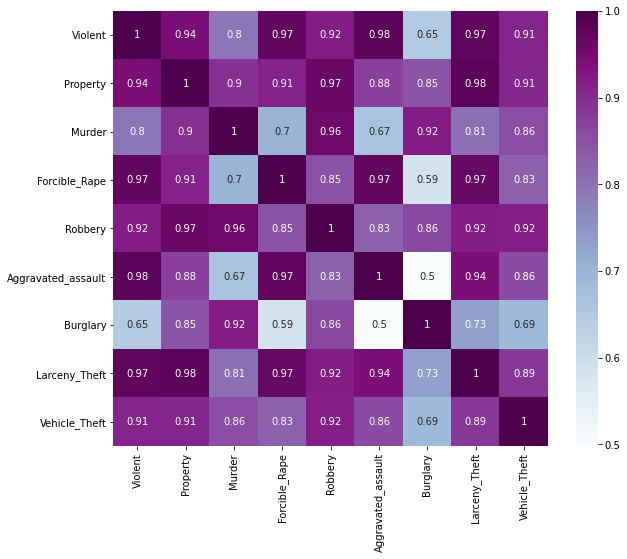

In [9]:
plt.subplots(figsize=(10, 8)) 
sns.heatmap(corr,  cmap= "BuPu", square=True,  annot=True)

5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.

Columnas con mas correlación con Murder son:    
'Property',  'Robbery', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft'

In [10]:
X=df[['Property', 'Robbery', 'Burglary', 'Larceny_Theft', 'Vehicle_Theft']].values

In [11]:
y=df['Murder'].values

In [12]:
print(X.shape)
print(y.shape)

(55, 5)
(55,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [14]:
X_train.shape, y_train.shape

((44, 5), (44,))

In [15]:
X_train

array([[ 8650761,   345095,  1931835,  6018632,   700294],
       [12961100,   687730,  3157200,  8142200,  1661700],
       [10608500,   485010,  2984400,  6591900,  1032200],
       [11805300,   535590,  2506400,  7904700,  1394200],
       [12605400,   578330,  3168200,  7872400,  1564800],
       [ 4200400,   130390,  1213200,  2514400,   472800],
       [10850500,   506570,  3129900,  6712800,  1007900],
       [ 9337060,   408742,  2203313,  6338095,   795652],
       [ 3450700,   110860,   994300,  2089600,   366800],
       [ 7413900,   376290,  2375500,  4151200,   887200],
       [10182586,   408016,  2050992,  6971590,  1160002],
       [ 6125200,   262840,  1858900,  3482700,   783600],
       [12063900,   580510,  2593800,  7997700,  1472400],
       [10437480,   423557,  2116531,  7092267,  1228391],
       [12218800,   659870,  2834800,  7820900,  1563100],
       [ 4793300,   157990,  1410100,  2822000,   561200],
       [ 6749000,   298850,  1981900,  3888600,   878500

In [16]:
# Import function to create training and test set splits
from sklearn.model_selection import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


In [17]:
polinominal_model = PolynomialFeatures(6) 
X_poly = polinominal_model.fit_transform(X_train,y_train)

#######
print(X_train.shape)
print(y_train.shape)
print(X_poly.shape)

lin_reg_model = LinearRegression()


(44, 5)
(44,)
(44, 462)


In [18]:
X_test.shape, y_test.shape

((11, 5), (11,))

In [19]:
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

print("y_pred", y_pred.shape)
print("Score:", r2_score(y_train, y_pred)*100, "% ")

y_pred (44,)
Score: 99.99999997801558 % 


Con X Test

In [20]:
X_poly.shape

(44, 462)

In [21]:
X_test.shape

(11, 5)

In [22]:
X_test_poly = polinominal_model.fit_transform(X_test) # ** CON TEST **

In [23]:
X_test_poly.shape

(11, 462)

In [24]:
ytest_pred = lin_reg_model.predict(X_test_poly)  # ** CON TEST **

In [25]:
ytest_pred.shape

(11,)

In [26]:
print("Score train:", r2_score(y_train, y_pred)*100, "% - ", "Score_test:", r2_score(y_test, ytest_pred)*100, "%")

Score train: 99.99999997801558 % -  Score_test: -55978630.68841075 %


In [27]:
# USANDO  VALIDACION CRUZADA
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold

k_fold = RepeatedKFold(n_splits=4, n_repeats=2, random_state=1)
val_score = []
train_score = []


In [28]:
for train, val in k_fold.split(X_poly):
    # train the model
    lin_reg_model.fit(X_poly[train], y_train[train])
    #predict with model

    y_pred_train = lin_reg_model.predict(X_poly[train])
    score_train = lin_reg_model.score(X_poly[train], y_train[train]) # Esto es lo mismo que r2_score(y_train[train], y_pred_train)

    train_score.append(score_train)
    
    y_pred_val = lin_reg_model.predict(X_poly[val])
    score_val = lin_reg_model.score(X_poly[val], y_train[val])
    #print(r2_score(y_train[val],y_pred_val)) (es equivalente a la línea de arriba)
    val_score.append(score_val)

X_polytest = polinominal_model.fit_transform(X_test)
score_test = lin_reg_model.score(X_polytest, y_test)  
print("Score test:", score_test) 

print("Score Val (mean): ", np.mean(val_score), "Score train (mean): ",np.mean(train_score))


Score test: -4498801.904328852
Score Val (mean):  -2360052.95630268 Score train (mean):  0.9999999999650924
